In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('credit_card.csv')

In [5]:
df.head(5)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [6]:
df.dtypes

,0
Client_Num,int64
Card_Category,object
Annual_Fees,int64
Activation_30_Days,int64
Customer_Acq_Cost,int64
Week_Start_Date,object
Week_Num,object
Qtr,object
current_year,int64
Credit_Limit,float64


In [7]:
df.isnull().sum()

,0
Client_Num,0
Card_Category,0
Annual_Fees,0
Activation_30_Days,0
Customer_Acq_Cost,0
Week_Start_Date,0
Week_Num,0
Qtr,0
current_year,0
Credit_Limit,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(10108, 18)

Lets remove unecssary columns for clustering like client_num which is like an id.

In [10]:
df.drop(columns=['Client_Num','Week_Start_Date','Week_Num','current_year','Qtr'], inplace=True)

# ***Feature Selection:**

In [11]:
df.drop(columns=['Total_Trans_Amt'], inplace=True)

In [12]:
##encoding

In [13]:
df_encoded = pd.get_dummies(df, columns=['Use Chip', 'Exp Type'], drop_first=True)
display(df_encoded.head())

,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Credit_Limit,Total_Revolving_Bal,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Use Chip_Online,Use Chip_Swipe,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Travel
0,Blue,200,0,87,3544.0,1661,111,0.469,4393.21,0,False,False,False,False,False,False,True
1,Blue,445,1,108,3421.0,2517,21,0.736,69.44,0,False,True,True,False,False,False,False
2,Blue,140,0,106,8258.0,1771,23,0.214,202.58,0,False,False,False,False,False,False,False
3,Blue,250,1,150,1438.3,0,82,0.000,236.40,0,True,False,False,False,False,True,False
4,Blue,320,1,106,3128.0,749,59,0.239,1004.87,1,False,True,False,False,True,False,False


In [14]:
df['Card_Category'].unique()

array(['Blue', 'Platinum', 'Silver', 'Gold'], dtype=object)

In [24]:
# Define the order and weights
card_weights = {'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}

# Map the values
df_encoded['Card_Category_Encoded'] = df_encoded['Card_Category'].map(card_weights)

# Drop the original column (optional)
df_encoded.drop('Card_Category', axis=1, inplace=True)

In [16]:
#SCALING

In [26]:
from sklearn.preprocessing import StandardScaler
# Example: List of columns to scale (adjust based on your DataFrame)
cols_to_scale = [
    'Annual_Fees', 'Customer_Acq_Cost', 'Credit_Limit',
    'Total_Revolving_Bal', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
    'Interest_Earned'
]

In [27]:
# Initialize scaler and transform
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [28]:
print(df_scaled[cols_to_scale].describe().round(2))

       Annual_Fees  Customer_Acq_Cost  Credit_Limit  Total_Revolving_Bal  \
count     10108.00           10108.00      10108.00             10108.00   
mean          0.00              -0.00         -0.00                 0.00   
std           1.00               1.00          1.00                 1.00   
min          -1.66              -2.18         -0.79                -1.43   
25%          -0.82              -0.67         -0.67                -0.99   
50%           0.03              -0.05         -0.45                 0.14   
75%           0.87               0.61          0.27                 0.76   
max           1.76               2.94          2.85                 1.66   

       Total_Trans_Vol  Avg_Utilization_Ratio  Interest_Earned  
count         10108.00               10108.00         10108.00  
mean              0.00                   0.00             0.00  
std               1.00                   1.00             1.00  
min              -2.34                  -1.00          

In [29]:
from sklearn.cluster import KMeans

# Initialize K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to your scaled data
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

In [30]:
print(df_scaled['Cluster'].value_counts())

Cluster
0    4701
1    4312
2    1095
Name: count, dtype: int64


In [32]:
cluster_summary = df_scaled.groupby('Cluster').mean().round(2)
cluster_summary

,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Credit_Limit,Total_Revolving_Bal,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Use Chip_Online,Use Chip_Swipe,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Travel,Card_Category_Encoded
Cluster,,,,,,,,,,,,,,,,,
0,0.0,0.60,-0.05,0.28,-0.67,-0.31,-0.78,-0.31,0.06,0.06,0.71,0.21,0.10,0.17,0.16,0.06,1.09
1,-0.0,0.56,0.03,-0.53,0.65,-0.06,0.97,-0.21,0.06,0.06,0.72,0.20,0.12,0.18,0.15,0.05,1.01
2,-0.0,0.55,0.08,0.92,0.31,1.59,-0.46,2.16,0.06,0.07,0.57,0.11,0.20,0.14,0.13,0.20,1.69


In [37]:
# Map clusters to business labels
cluster_labels = {
    0: "Low-Risk (Cautious)",   # Moderate spending, low utilization
    1: "High-Risk",             # High utilization, low credit limits
    2: "VIP (High-Value)"       # High credit limits + high spending
}
df_scaled['Segment'] = df_scaled['Cluster'].map(cluster_labels)

In [38]:
print(df_scaled['Segment'].value_counts())

Segment
Low-Risk (Cautious)    4701
High-Risk              4312
VIP (High-Value)       1095
Name: count, dtype: int64


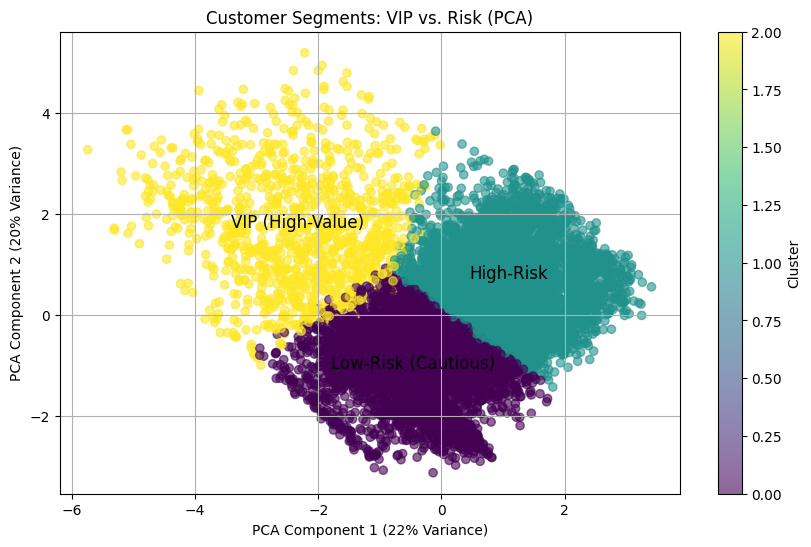

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure you're using the scaled data (with 'Cluster' column)
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled.drop(['Cluster', 'Segment'], axis=1))  # Exclude labels

# Plot with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    components[:, 0],
    components[:, 1],
    c=df_scaled['Cluster'],
    cmap='viridis',
    alpha=0.6
)

# Label clusters directly on the plot
for cluster in [0, 1, 2]:
    x_mean = components[df_scaled['Cluster'] == cluster, 0].mean()
    y_mean = components[df_scaled['Cluster'] == cluster, 1].mean()
    plt.text(x_mean, y_mean, cluster_labels[cluster], fontsize=12, ha='center')

plt.title('Customer Segments: VIP vs. Risk (PCA)')
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.0%} Variance)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.0%} Variance)')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

### **Insights**
1. **VIP (High-Value)**: High spending (`Total_Trans_Amt=1.75`) and credit limits (`1.25`).  
2. **High-Risk**: Dangerous utilization (`0.97`) despite low limits (`-0.53`).  
3. **Low-Risk**: Conservative usage (utilization `-0.78`).  